In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [4]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [9]:
df.shape

(42, 2)

In [10]:
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

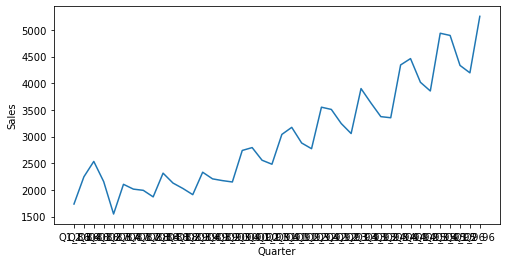

In [11]:
#Line plot
plt.figure(figsize=(8,4))
sns.lineplot(x='Quarter', y='Sales', data=df);

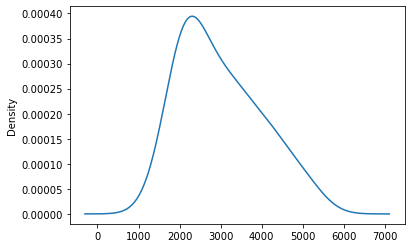

In [12]:
#Kernel Density plot
df.Sales.plot(kind='kde');

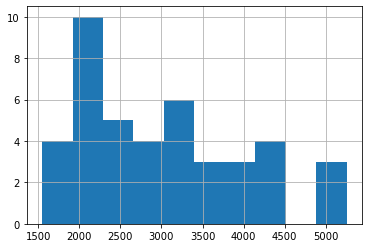

In [13]:
# Histogram
df.Sales.hist();

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


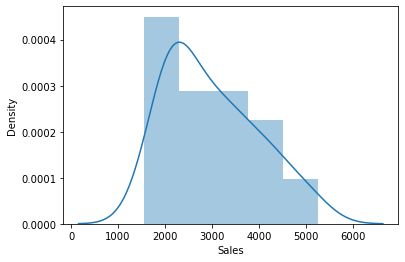

In [14]:
# Distribution plot
sns.distplot(df['Sales']);

In [15]:
# creating 'quarter' & 'Year' columns and assigning '0' values
quarter=['Q1','Q2','Q3','Q4']
df['quarter']=0
df['Year']=0

In [16]:
df.head()

,Quarter,Sales,quarter,Year
0,Q1_86,1734.827000,0,0
1,Q2_86,2244.960999,0,0
2,Q3_86,2533.804993,0,0
3,Q4_86,2154.962997,0,0
4,Q1_87,1547.818996,0,0


In [17]:
# extracting Q1,Q2,Q3,Q4 from 'Quarter' and assigning to 'quarter' column
for i in range(42):
    n=df['Quarter'][i]
    df['quarter'][i]=n[0:2]
    df['Year'][i]=n[3:5]

<ipython-input-17-8742b291299c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i]=n[0:2]
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-17-8742b291299c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][i]=n[3:5]


In [18]:
df.head()

,Quarter,Sales,quarter,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   quarter  42 non-null     object 
 3   Year     42 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


In [20]:
df['Year']= pd.to_numeric(df['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   quarter  42 non-null     object 
 3   Year     42 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


<AxesSubplot:xlabel='Year', ylabel='Sales'>

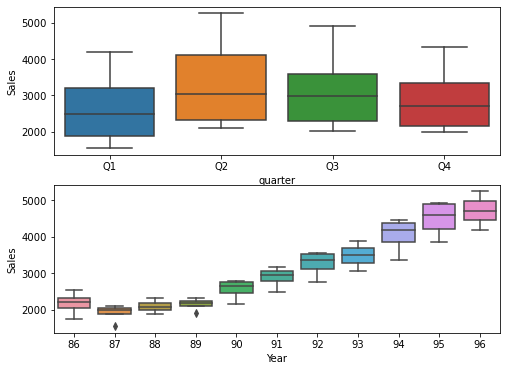

In [21]:
#Boxplot

plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x= 'quarter', y= 'Sales', data=df)
plt.subplot(212)
sns.boxplot(x= 'Year', y= 'Sales', data=df)

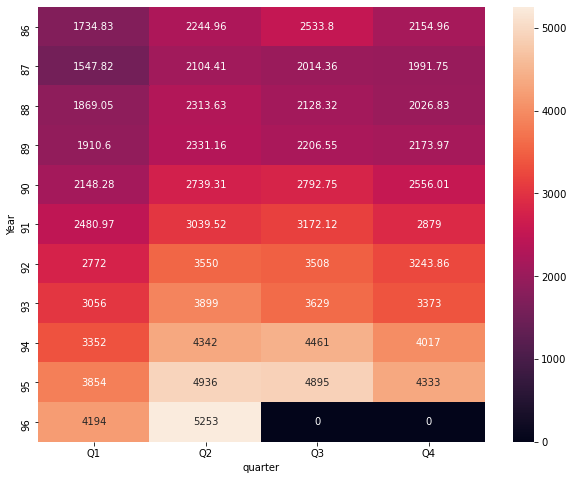

In [22]:
# Heatmap
plt.figure(figsize=(10,8))
heatmap_pivot = pd.pivot_table( data=df, values='Sales', index='Year', columns='quarter', aggfunc='mean', fill_value=0)
sns.heatmap(heatmap_pivot, annot=True, fmt='g');   # fmt is format  of grid values

In [23]:
#Creating dummies for "quarter"
quarter_dummies = pd.get_dummies(df['quarter'])
quarter_dummies.head(5)

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [24]:
df1 = pd.concat([df,quarter_dummies], axis=1)
df1.head()

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [25]:
#calculating t, t_square & log_sales values

df1['t']=np.arange(1,43)
df1['t_square']=df1['t']*df1['t']
df1['log_sales']=np.log(df1['Sales'])

In [26]:
df1.head()

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [ ]:
#Model Building

In [27]:
Train = df1.head(30)
Test = df1.tail(12)

In [28]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [29]:
#linear model

linear_model = smf.ols('Sales~t',Train).fit()
pred_linear = linear_model.predict(Test)
rmse_linear = np.sqrt(mean_squared_error(Test['Sales'], pred_linear))
rmse_linear

714.0144483281305

In [30]:
#Quadratic Model

quad_model = smf.ols('Sales~t+t_square',data=Train).fit()
pred_quad = quad_model.predict(Test)
rmse_quad = np.sqrt(mean_squared_error(Test['Sales'], pred_quad))
rmse_quad

646.2715428312007

In [31]:
#Exponential Model

exp_model = smf.ols('log_sales~t',data=Train).fit()
pred_exp = exp_model.predict(Test)
rmse_exp = np.sqrt(mean_squared_error(Test['Sales'],np.exp(pred_exp)))
rmse_exp

552.2821039079263

In [32]:
#Additive seasonality

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = add_sea.predict(Test)
rmse_add_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea))
rmse_add_sea

1778.0065467941367

In [33]:
#Additive seasonality Quadratic

add_sea_quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = add_sea_quad.predict(Test)
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea_quad))
rmse_add_sea_quad

586.0533067869585

In [34]:
#Multiplicative Seasonality

mult_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_mult_sea = mult_sea.predict(Test)
rmse_mult_sea = np.sqrt(mean_squared_error(Test['Sales'], np.exp(pred_mult_sea)))
rmse_mult_sea

1828.923891213814

In [35]:
#Multiplicative Additive Seasonality 

mult_add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data=Train).fit()
pred_mult_add_sea = mult_add_sea.predict(Test)
rmse_mult_add_sea = np.sqrt(mean_squared_error(Test['Sales'], np.exp(pred_mult_add_sea)))
rmse_mult_add_sea

410.2497059602138

In [36]:
# Compare the results
data= pd.DataFrame({'Model':(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea","rmse_mult_add_sea"]),
                    'RMSE value': ([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])})
data.sort_values('RMSE value')

,Model,RMSE value
6,rmse_mult_add_sea,410.249706
1,rmse_exp,552.282104
4,rmse_add_sea_quad,586.053307
2,rmse_quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_mult_sea,1828.923891


In [37]:
Final_model = smf.ols('log_sales~t+Q1+Q2+Q3',data=df1).fit()

In [38]:
new_data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(new_data)
forecast = pd.DataFrame(new_data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [39]:
dummies = pd.get_dummies(forecast['quarter'])

In [40]:
forecast_df = pd.concat([forecast,dummies], axis=1)
forecast_df['t']= np.arange(1,5)
forecast_df['t_square']= forecast_df['t']*forecast_df['t']
#forecast_df['log_sales']= np.log(forecast_df['Sales'])
forecast_df

,Quarter,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q3_96,Q3,0,0,1,0,1,1
1,Q4_96,Q4,0,0,0,1,2,4
2,Q1_97,Q1,1,0,0,0,3,9
3,Q2_97,Q2,0,1,0,0,4,16


In [ ]:
#Forecasting

In [41]:
#Forecasting on new data (forecast_df)
pred_final =Final_model.predict(forecast_df)
forecasted_sales = np.exp(pred_final)
forecasted_sales

0    1850.097087
1    1707.728369
2    1615.755820
3    2055.102678
dtype: float64

In [42]:
forecast_df['forecasted_sales']= pd.DataFrame(forecasted_sales)

In [43]:
forecast_df

,Quarter,quarter,Q1,Q2,Q3,Q4,t,t_square,forecasted_sales
0,Q3_96,Q3,0,0,1,0,1,1,1850.097087
1,Q4_96,Q4,0,0,0,1,2,4,1707.728369
2,Q1_97,Q1,1,0,0,0,3,9,1615.755820
3,Q2_97,Q2,0,1,0,0,4,16,2055.102678
